XGBOOST REGRESSOR

In [580]:
import pandas as pd 
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
import xgboost
from datetime import date,timedelta
import requests

In [581]:
import warnings 
xgboost.set_config(verbosity=0)
warnings.filterwarnings('ignore')

In [582]:
api_key = "9b5bd2cd0c808cd58f2673a9a5a51a4b"
api_temp = "00f5abf172cb4b6e9d60aa5ae08ccdbe"
latitude = 13.082680
longitude = 80.270721
date = date.today() -  timedelta(days=1)
interval  = "15m"  #15 minute intervals

url_sunhours = "https://api.openweathermap.org/energy/1.0/solar/interval_data?lat={}&lon={}&date={}&interval={}&tz=+05:30&appid={}".format(latitude,longitude,date,interval,api_key)
url_temperature = "https://api.weatherbit.io/v2.0/history/subhourly?lat={}&lon={}&start_date={}&end_date={}&key={}".format(latitude,longitude,date,date,api_temp)


In [583]:
df = pd.read_csv("/Users/aditirajesh/Desktop/program_files/python/python_6sem/DATA_PLANTS/plant2/data6_2.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATE          34 non-null     object 
 1   AMBIENT_TEMP  34 non-null     float64
 2   MODULE_TEMP   34 non-null     float64
 3   SUN_HOURS     34 non-null     float64
 4   YIELD         34 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.5+ KB


In [584]:
df['YIELD'] = pd.to_numeric(df['YIELD'])
df['DATE'] = pd.to_datetime(df['DATE'])

In [585]:
x = df.iloc[:,1:4].values
y = df.iloc[:,-1].values


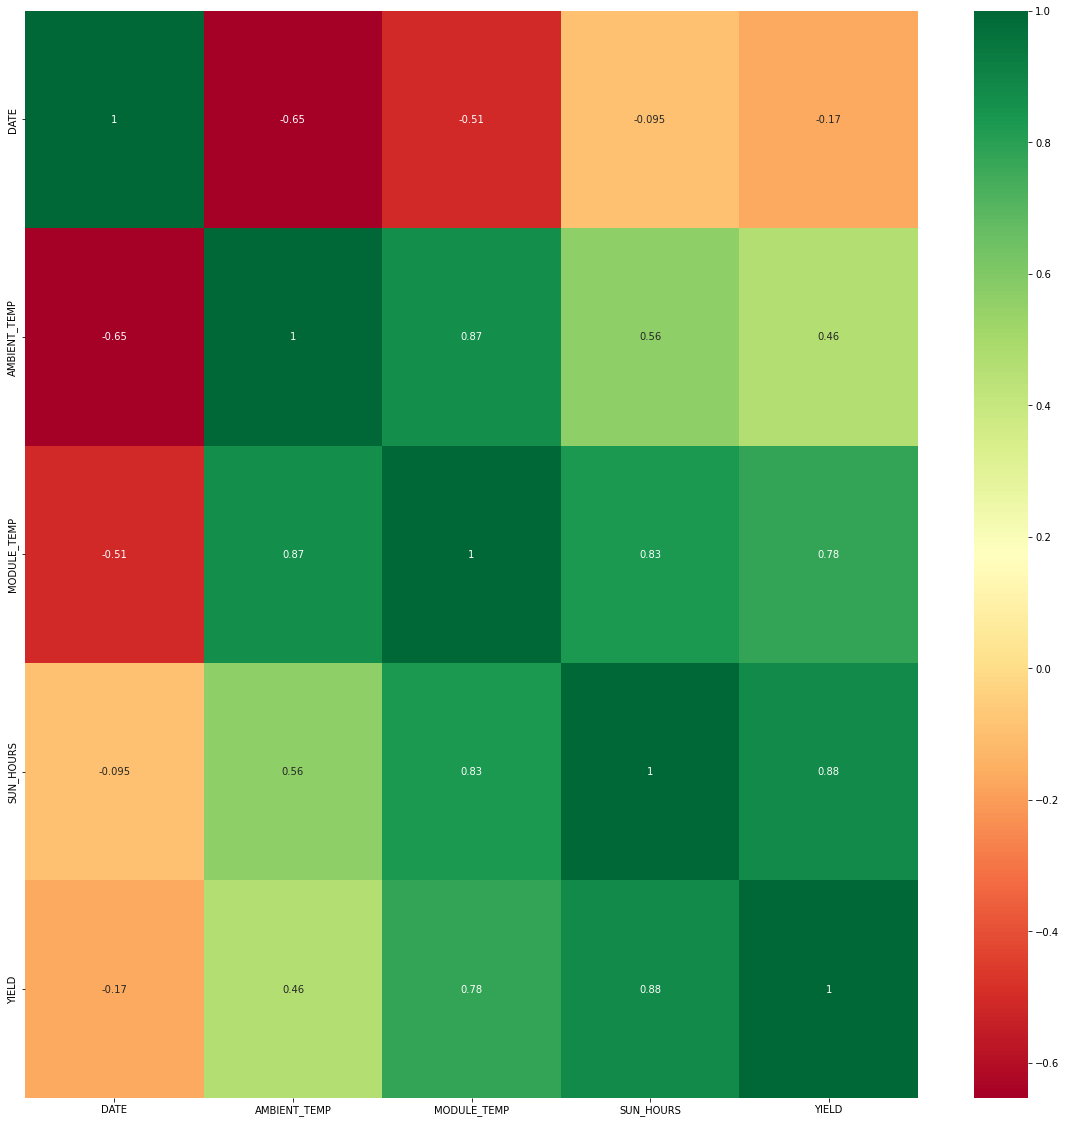

In [586]:
corrmat = df[1:].corr()
top_corr = corrmat.index 
plt.figure(figsize=(20,20))
g = sb.heatmap(df[top_corr].corr(),annot=True,cmap="RdYlGn")

In [587]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1,test_size=0.2)


In [588]:
params = {
    "learning_rate" : [0.01,0.05,0.10],
    "max_depth" : [3,4,5],
    "n_estimators": [1100,1200,1500],
    "gamma": [0.0,0.1,0.2],
    "colsample_bytree": [0.8,0.9,1.0]
}

In [589]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [590]:
from xgboost import XGBRegressor
xg_regressor = XGBRegressor()
eval_set = [(x_test,y_test)]

In [ ]:
random_search = RandomizedSearchCV(xg_regressor,
                                   param_distributions=params,
                                   n_iter=5,
                                   scoring='roc_auc',
                                   n_jobs=-1,
                                   cv = 5,
                                   verbose=3)

random_search.fit(x_train,y_train,eval_metric="error",eval_set=eval_set,verbose=True)

In [592]:
random_search.best_params_

{'n_estimators': 1100,
 'max_depth': 4,
 'learning_rate': 0.05,
 'gamma': 0.2,
 'colsample_bytree': 0.9}

In [593]:
random_search.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [594]:
xg_regressor= XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9, gamma=0.1, learning_rate=1,
       max_delta_step=0, max_depth=5, min_child_weight=7, missing=1,
       n_estimators=1200, n_jobs=1, nthread=None, random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None,
       subsample=1,
       objective="reg:squarederror")



In [595]:

y_pred = random_search.predict(x_test)
y_train_pred = random_search.predict(x_train)


In [596]:
xg_regressor.fit(x,y)
y2_pred = xg_regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y2_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[8100.25 8099.  ]
 [7825.96 7826.  ]
 [5655.97 5369.  ]
 [5655.97 5591.  ]
 [6219.73 6220.  ]
 [6419.01 6419.  ]
 [8129.97 8130.  ]]


In [597]:
xg_regressor.score(x_train,y_train)

0.9822826511736629

In [598]:
xg_regressor.score(x_test,y_test)

0.9898139380120818

In [599]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[8046.54 8099.  ]
 [7053.97 7826.  ]
 [5779.58 5369.  ]
 [5850.23 5591.  ]
 [5779.55 6220.  ]
 [6337.28 6419.  ]
 [8260.12 8130.  ]]


In [600]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train,y_train_pred)
rmse = np.sqrt(mse)
print(rmse)

0.5596781383830904


In [601]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(rmse)

387.69811450605965


In [602]:
from sklearn.model_selection import cross_val_score,RepeatedKFold
scores = cross_val_score(xg_regressor,x,y,scoring="neg_mean_squared_error",cv=10,error_score='raise')
print(scores)

[-1282002.12 -2284286.79  -101777.23   -27688.09   -70705.27  -516546.45
  -194369.37    -6492.34  -182393.68  -222196.64]


In [603]:
rmse = np.sqrt(-scores)
print(rmse)

[1132.26 1511.39  319.03  166.4   265.9   718.71  440.87   80.58  427.08
  471.38]


In [604]:
response = requests.get(url_sunhours)
data = response.json()
irradiation_today = data['irradiance']['daily']
print(irradiation_today)
cloudy_sky_irr = irradiation_today[0]['cloudy_sky']['dni']/1000

[{'clear_sky': {'ghi': 7979.51, 'dni': 9614.12, 'dhi': 1220.87}, 'cloudy_sky': {'ghi': 7714.03, 'dni': 8742.68, 'dhi': 1371.34}}]


In [605]:
response = requests.get(url_temperature)
data = response.json()
print(data)


{'error': 'end_date is equal to start_date. end_date should be after start_date.'}
